In [123]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata
from Funciones import mm_a_grados, generar_puntos_circunferencia
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Circle


In [118]:

# Ruta donde están almacenados los archivos .csv
ruta_archivos = "Eyetracker Derecho/*.csv"  # Cambia esto a la ruta de tus archivos

# Lista para almacenar los dataframes de cada archivo
dataframes = []
# Leer y agregar cada archivo csv a la lista
for archivo in glob.glob(ruta_archivos):
    df = pd.read_csv(archivo,delimiter=';')
    dataframes.append(df)

# Concatenar todos los dataframes en uno solo
datos_completos = pd.concat(dataframes)

# Agrupar por 'coordenada x' y 'coordenada y', sumando la 'frecuencia de acierto'
resultado = datos_completos.groupby(['coordenada x [mm]', 'coordenada y [mm]'])['aciertos'].sum().reset_index()

# Guardar el resultado en un nuevo archivo CSV
resultado.to_csv("frecuencia_acierto_total_derecho.csv", index=False)

print("Archivo 'frecuencia_acierto_total_derecho.csv' generado con éxito.")

Archivo 'frecuencia_acierto_total_derecho.csv' generado con éxito.


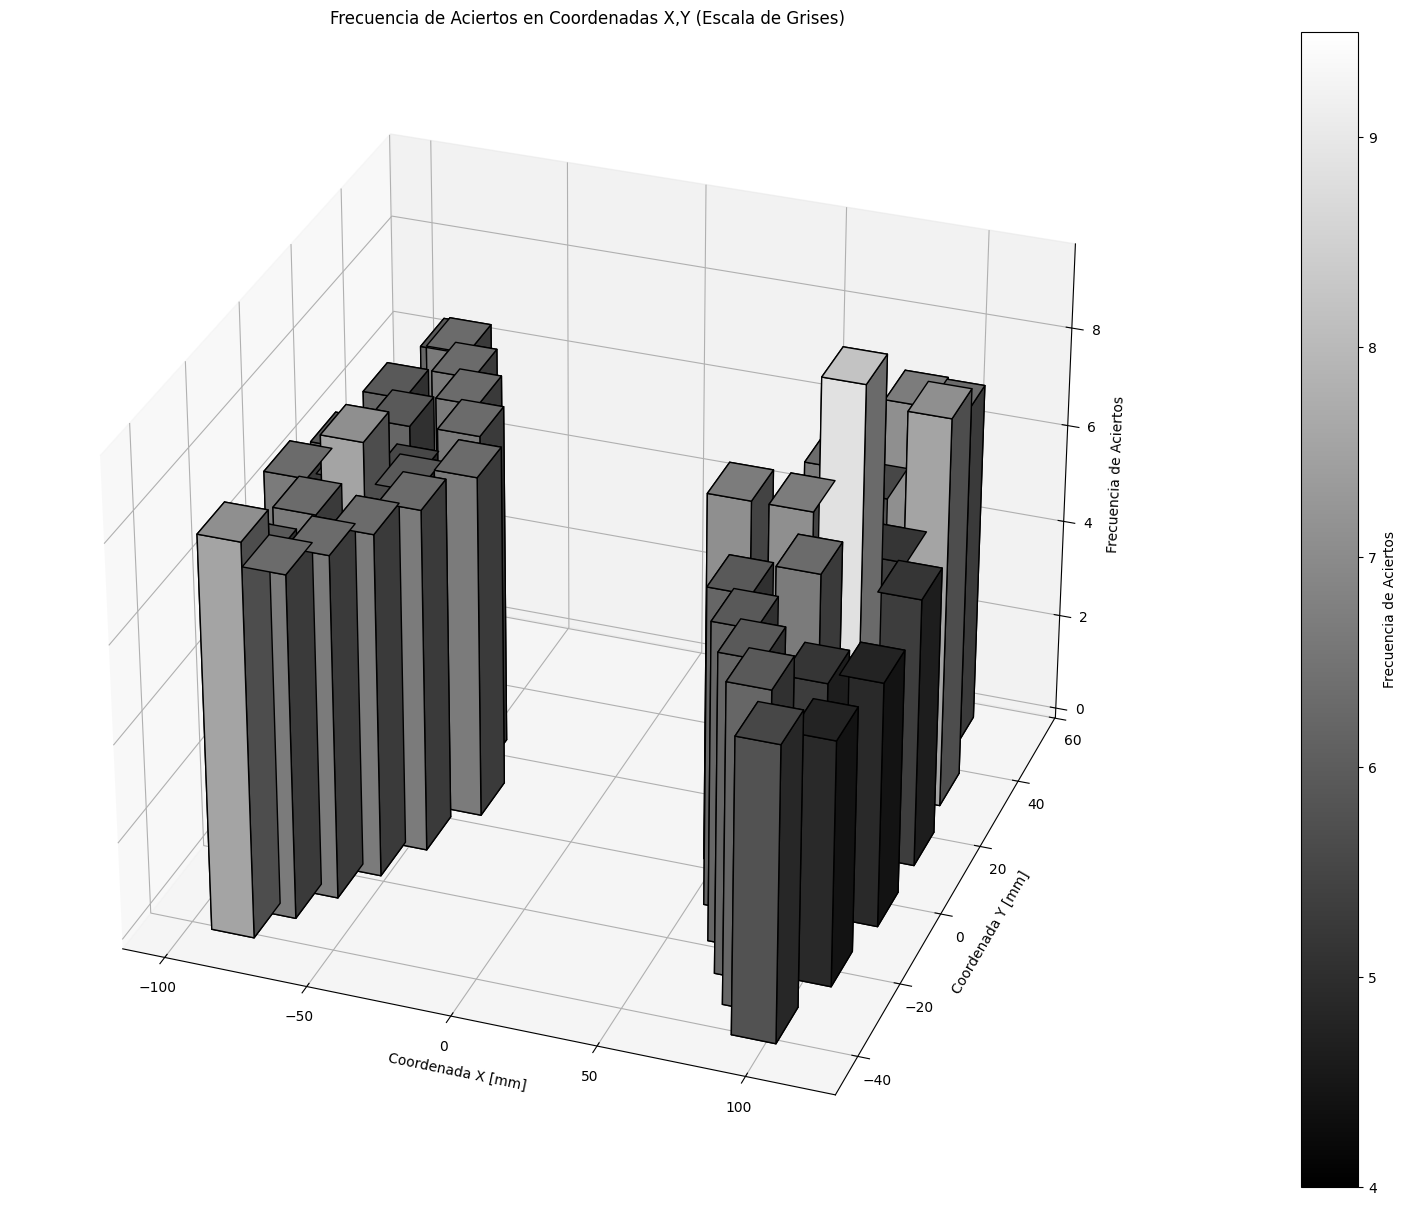

In [143]:
# Cargar el archivo generado previamente
df = pd.read_csv("frecuencia_acierto_total_derecho.csv")

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111, projection='3d')

# Asignar las coordenadas x, y y la frecuencia de aciertos
x = df['coordenada x [mm]']
y = df['coordenada y [mm]']
z = df['aciertos']

# Normalizar los valores de frecuencia para usar en una escala de grises
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.gray(norm(z))

# Graficar las barras en 3D con la escala de grises
ax.bar3d(x, y, np.zeros_like(z), dx=15, dy=10, dz=z, color=colors, edgecolor='k')

# Añadir una barra de color para mostrar la escala de grises
mappable = plt.cm.ScalarMappable(cmap='gray', norm=norm)
mappable.set_array(z)
plt.colorbar(mappable, ax=ax, label='Frecuencia de Aciertos')

# Etiquetas de los ejes
ax.set_xlabel('Coordenada X [mm]')
ax.set_ylabel('Coordenada Y [mm]')
ax.set_zlabel('Frecuencia de Aciertos')

# Ajustar la orientación de la vista
ax.view_init(elev=30, azim=290)

# Título de la gráfica
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
plt.show()

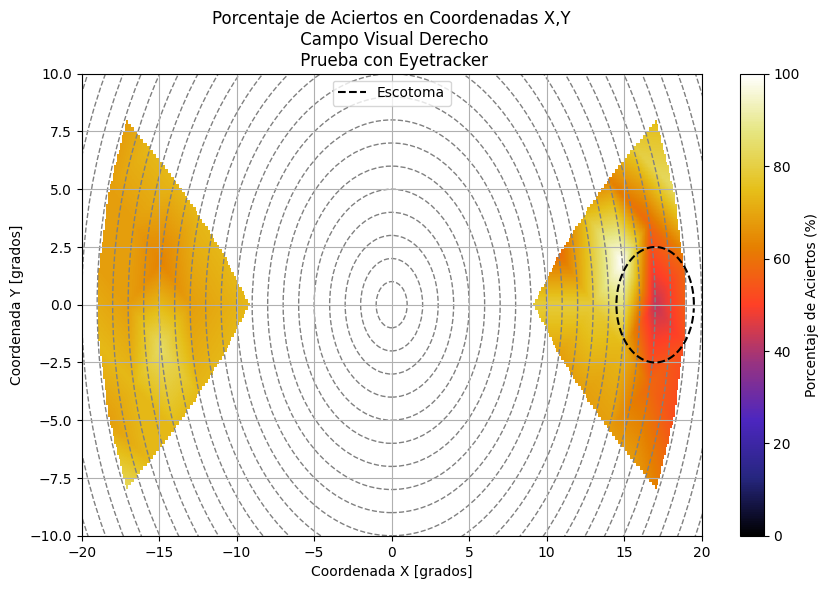

In [144]:

# Calcular el máximo de aciertos para normalizar a porcentaje
max_aciertos = df['aciertos'].max()

# Dividir el dataframe en dos secciones: una con x < 0 y otra con x > 0
df_neg = df[df['coordenada x [mm]'] < 0]
df_pos = df[df['coordenada x [mm]'] >= 0]

# Interpolar datos para x < 0 y normalizar
grid_x_neg, grid_y_neg = np.mgrid[
    mm_a_grados(df_neg['coordenada x [mm]']).min():mm_a_grados(df_neg['coordenada x [mm]']).max():100j,
    mm_a_grados(df_neg['coordenada y [mm]']).min():mm_a_grados(df_neg['coordenada y [mm]']).max():100j
]
grid_z_neg = griddata(
    (mm_a_grados(df_neg['coordenada x [mm]']), mm_a_grados(df_neg['coordenada y [mm]'])),
    df_neg['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_neg, grid_y_neg),
    method='linear'
)

# Interpolar datos para x > 0 y normalizar
grid_x_pos, grid_y_pos = np.mgrid[
    mm_a_grados(df_pos['coordenada x [mm]']).min():mm_a_grados(df_pos['coordenada x [mm]']).max():100j,
    mm_a_grados(df_pos['coordenada y [mm]']).min():mm_a_grados(df_pos['coordenada y [mm]']).max():100j
]
grid_z_pos = griddata(
    (mm_a_grados(df_pos['coordenada x [mm]']), mm_a_grados(df_pos['coordenada y [mm]'])),
    df_pos['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_pos, grid_y_pos),
    method='linear'
)

# Crear la gráfica suavizada
plt.figure(figsize=(10, 6))

# Mostrar la interpolación para x < 0
plt.imshow(grid_z_neg.T, extent=(grid_x_neg.min(), grid_x_neg.max(), grid_y_neg.min(), grid_y_neg.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Mostrar la interpolación para x > 0
plt.imshow(grid_z_pos.T, extent=(grid_x_pos.min(), grid_x_pos.max(), grid_y_pos.min(), grid_y_pos.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Escotoma
px, py = generar_puntos_circunferencia(2.5, 0, 2 * np.pi, 100, centro=(17, 0))
plt.plot(px, py, color='black', linestyle='--', label='Escotoma')

# Añadir una barra de color para el porcentaje de aciertos
plt.colorbar(label='Porcentaje de Aciertos (%)')

# Etiquetas y título
plt.xlabel('Coordenada X [grados]')
plt.ylabel('Coordenada Y [grados]')
plt.xlim(-20,20)
plt.ylim(-10,10)
plt.title("Porcentaje de Aciertos en Coordenadas X,Y\n Campo Visual Derecho\n Prueba con Eyetracker")
plt.grid(True, axis='both')
plt.legend()  # Muestra la leyenda
    
# Añadir circunferencias de cuadrícula
for i in range(0, 30):
    circulo = Circle((0, 0), i, linestyle='--', facecolor='none', edgecolor='grey')        
    plt.gca().add_artist(circulo)

# Mostrar la gráfica
plt.show()

In [129]:
# Ruta donde están almacenados los archivos .csv
ruta_archivos = "Teclado Derecho/*.csv"  # Cambia esto a la ruta de tus archivos
# Lista para almacenar los dataframes de cada archivo
dataframes = []
# Leer y agregar cada archivo csv a la lista
for archivo in glob.glob(ruta_archivos):
    df = pd.read_csv(archivo,delimiter=';')
    dataframes.append(df)

# Concatenar todos los dataframes en uno solo
datos_completos = pd.concat(dataframes)

# Agrupar por 'coordenada x' y 'coordenada y', sumando la 'frecuencia de acierto'
resultado = datos_completos.groupby(['coordenada x [mm]', 'coordenada y [mm]'])['aciertos'].sum().reset_index()

# Guardar el resultado en un nuevo archivo CSV
resultado.to_csv("frecuencia_acierto_total_teclado_derecho.csv", index=False)

print("Archivo 'frecuencia_acierto_total_teclado_derecho.csv' generado con éxito.")

Archivo 'frecuencia_acierto_total_teclado_derecho.csv' generado con éxito.


Text(0.5, 0.92, 'Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)')

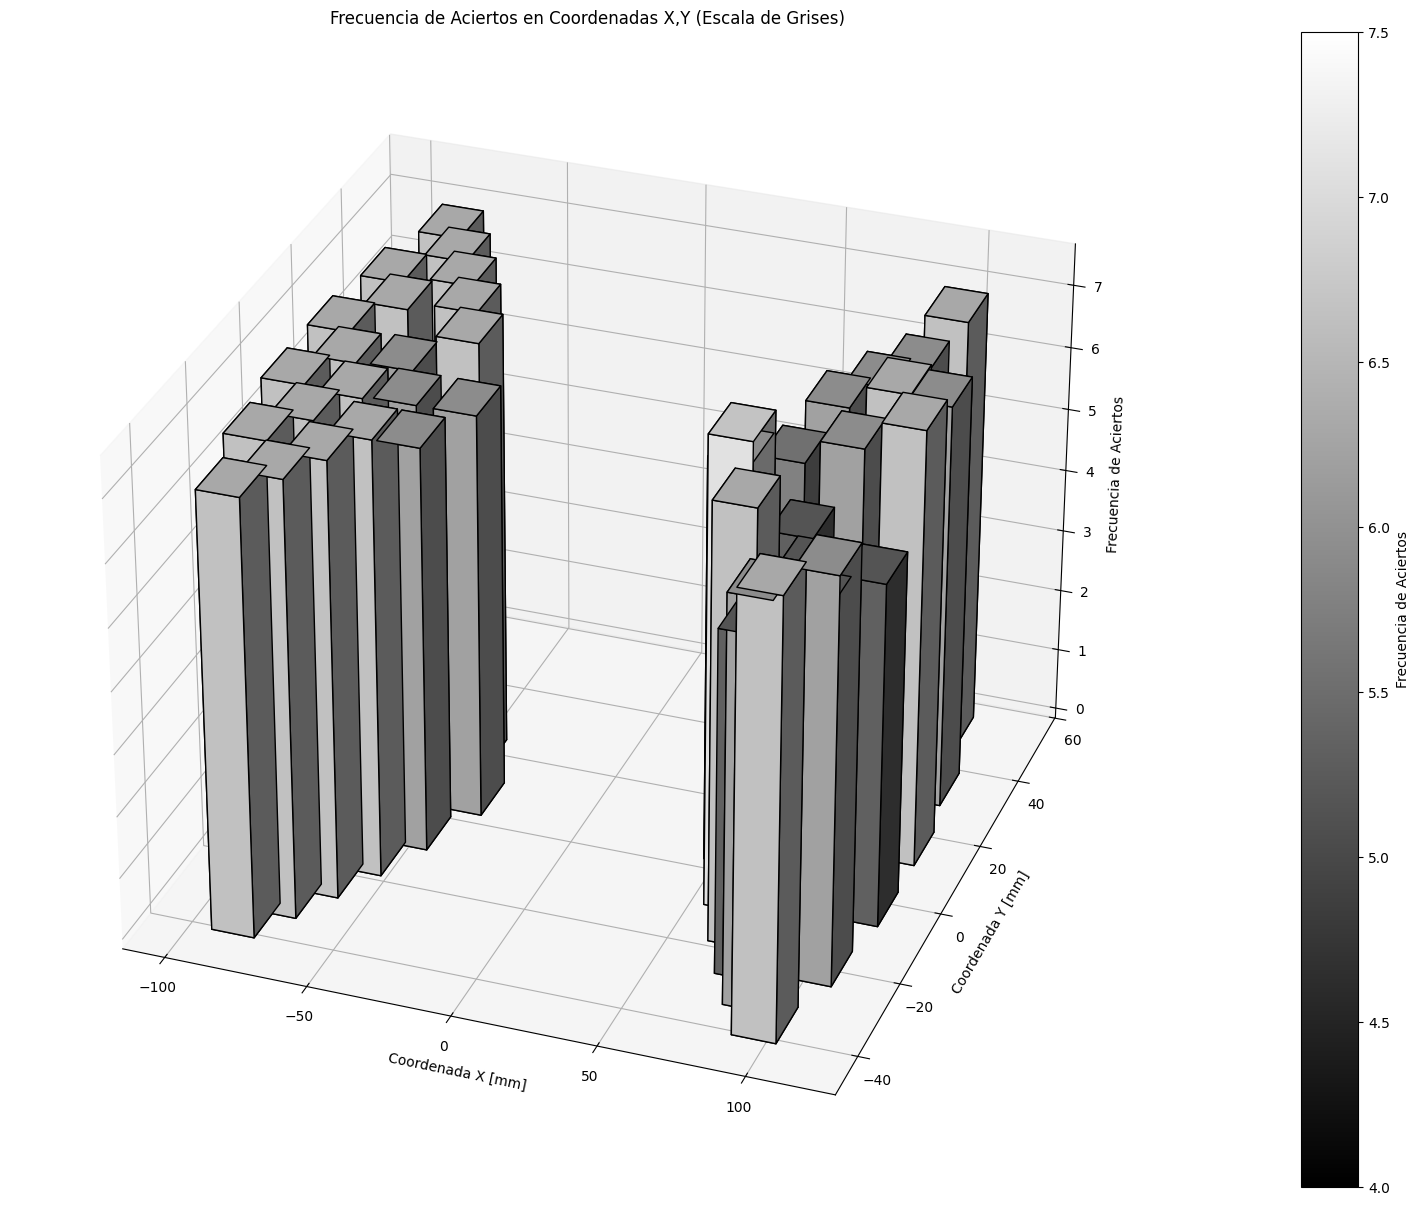

In [139]:
# Cargar el archivo generado previamente
df = pd.read_csv("frecuencia_acierto_total_teclado_derecho.csv")

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111, projection='3d')

# Asignar las coordenadas x, y y la frecuencia de aciertos
x = df['coordenada x [mm]']
y = df['coordenada y [mm]']
z = df['aciertos']

# Normalizar los valores de frecuencia para usar en una escala de grises
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.gray(norm(z))

# Graficar las barras en 3D con la escala de grises
ax.bar3d(x, y, np.zeros_like(z), dx=15, dy=10, dz=z, color=colors, edgecolor='k')

# Añadir una barra de color para mostrar la escala de grises
mappable = plt.cm.ScalarMappable(cmap='gray', norm=norm)
mappable.set_array(z)
plt.colorbar(mappable, ax=ax, label='Frecuencia de Aciertos')

# Etiquetas de los ejes
ax.set_xlabel('Coordenada X [mm]')
ax.set_ylabel('Coordenada Y [mm]')
ax.set_zlabel('Frecuencia de Aciertos')

# Ajustar la orientación de la vista
ax.view_init(elev=30, azim=290)

# Título de la gráfica
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
#plt.show()

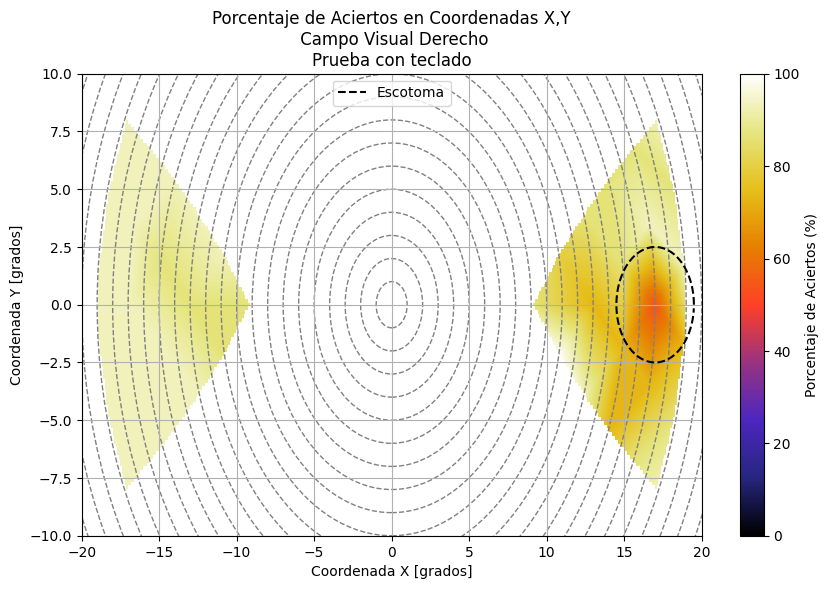

In [142]:
# Calcular el máximo de aciertos para normalizar a porcentaje
max_aciertos = df['aciertos'].max()

# Dividir el dataframe en dos secciones: una con x < 0 y otra con x > 0
df_neg = df[df['coordenada x [mm]'] < 0]
df_pos = df[df['coordenada x [mm]'] >= 0]

# Interpolar datos para x < 0 y normalizar
grid_x_neg, grid_y_neg = np.mgrid[
    mm_a_grados(df_neg['coordenada x [mm]']).min():mm_a_grados(df_neg['coordenada x [mm]']).max():100j,
    mm_a_grados(df_neg['coordenada y [mm]']).min():mm_a_grados(df_neg['coordenada y [mm]']).max():100j
]
grid_z_neg = griddata(
    (mm_a_grados(df_neg['coordenada x [mm]']), mm_a_grados(df_neg['coordenada y [mm]'])),
    df_neg['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_neg, grid_y_neg),
    method='linear'
)

# Interpolar datos para x > 0 y normalizar
grid_x_pos, grid_y_pos = np.mgrid[
    mm_a_grados(df_pos['coordenada x [mm]']).min():mm_a_grados(df_pos['coordenada x [mm]']).max():100j,
    mm_a_grados(df_pos['coordenada y [mm]']).min():mm_a_grados(df_pos['coordenada y [mm]']).max():100j
]
grid_z_pos = griddata(
    (mm_a_grados(df_pos['coordenada x [mm]']), mm_a_grados(df_pos['coordenada y [mm]'])),
    df_pos['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_pos, grid_y_pos),
    method='linear'
)

# Crear la gráfica suavizada
plt.figure(figsize=(10, 6))

# Mostrar la interpolación para x < 0
plt.imshow(grid_z_neg.T, extent=(grid_x_neg.min(), grid_x_neg.max(), grid_y_neg.min(), grid_y_neg.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Mostrar la interpolación para x > 0
plt.imshow(grid_z_pos.T, extent=(grid_x_pos.min(), grid_x_pos.max(), grid_y_pos.min(), grid_y_pos.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Escotoma
px, py = generar_puntos_circunferencia(2.5, 0, 2 * np.pi, 100, centro=(17, 0))
plt.plot(px, py, color='black', linestyle='--', label='Escotoma')

# Añadir una barra de color para el porcentaje de aciertos
plt.colorbar(label='Porcentaje de Aciertos (%)')

# Etiquetas y título
plt.xlabel('Coordenada X [grados]')
plt.ylabel('Coordenada Y [grados]')
plt.xlim(-20,20)
plt.ylim(-10,10)
plt.title("Porcentaje de Aciertos en Coordenadas X,Y\n Campo Visual Derecho\nPrueba con teclado")
plt.grid(True, axis='both')
plt.legend()  # Muestra la leyenda
    
# Añadir circunferencias de cuadrícula
for i in range(0, 30):
    circulo = Circle((0, 0), i, linestyle='--', facecolor='none', edgecolor='grey')        
    plt.gca().add_artist(circulo)

# Mostrar la gráfica
plt.show()

## Ojo Izquierdo

In [145]:
# Ruta donde están almacenados los archivos .csv
ruta_archivos = "Eyetracker Izquierdo/*.csv"  # Cambia esto a la ruta de tus archivos
# Lista para almacenar los dataframes de cada archivo
dataframes = []
# Leer y agregar cada archivo csv a la lista
for archivo in glob.glob(ruta_archivos):
    df = pd.read_csv(archivo,delimiter=';')
    dataframes.append(df)

# Concatenar todos los dataframes en uno solo
datos_completos = pd.concat(dataframes)

# Agrupar por 'coordenada x' y 'coordenada y', sumando la 'frecuencia de acierto'
resultado = datos_completos.groupby(['coordenada x [mm]', 'coordenada y [mm]'])['aciertos'].sum().reset_index()

# Guardar el resultado en un nuevo archivo CSV
resultado.to_csv("frecuencia_acierto_total_eyetracker_izquierdo.csv", index=False)

print("Archivo 'frecuencia_acierto_total_eyetracker_izquierdo.csv' generado con éxito.")

Archivo 'frecuencia_acierto_total_eyetracker_izquierdo.csv' generado con éxito.


Text(0.5, 0.92, 'Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)')

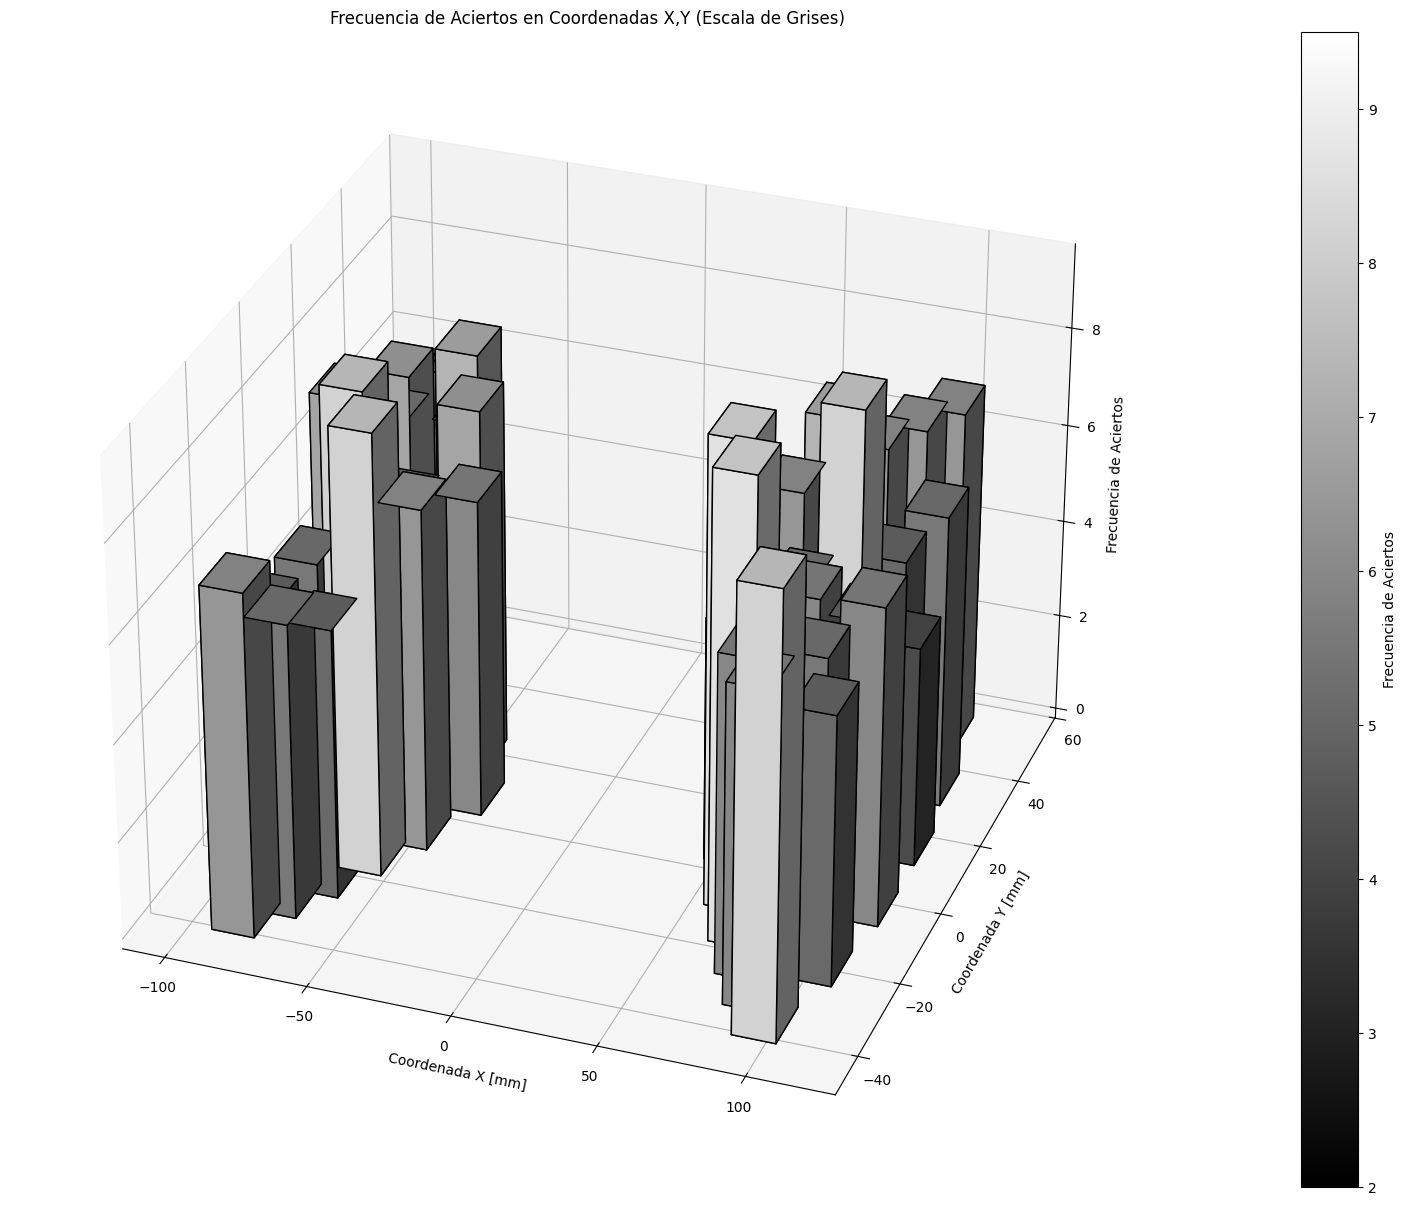

In [146]:
# Cargar el archivo generado previamente
df = pd.read_csv("frecuencia_acierto_total_eyetracker_izquierdo.csv")

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111, projection='3d')

# Asignar las coordenadas x, y y la frecuencia de aciertos
x = df['coordenada x [mm]']
y = df['coordenada y [mm]']
z = df['aciertos']

# Normalizar los valores de frecuencia para usar en una escala de grises
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.gray(norm(z))

# Graficar las barras en 3D con la escala de grises
ax.bar3d(x, y, np.zeros_like(z), dx=15, dy=10, dz=z, color=colors, edgecolor='k')

# Añadir una barra de color para mostrar la escala de grises
mappable = plt.cm.ScalarMappable(cmap='gray', norm=norm)
mappable.set_array(z)
plt.colorbar(mappable, ax=ax, label='Frecuencia de Aciertos')

# Etiquetas de los ejes
ax.set_xlabel('Coordenada X [mm]')
ax.set_ylabel('Coordenada Y [mm]')
ax.set_zlabel('Frecuencia de Aciertos')

# Ajustar la orientación de la vista
ax.view_init(elev=30, azim=290)

# Título de la gráfica
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
#plt.show()

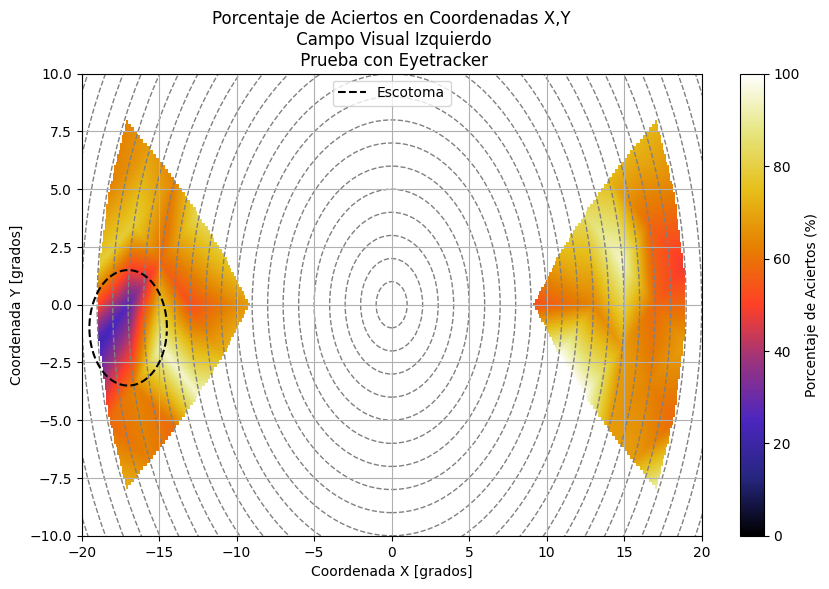

In [148]:
# Calcular el máximo de aciertos para normalizar a porcentaje
max_aciertos = df['aciertos'].max()

# Dividir el dataframe en dos secciones: una con x < 0 y otra con x > 0
df_neg = df[df['coordenada x [mm]'] < 0]
df_pos = df[df['coordenada x [mm]'] >= 0]

# Interpolar datos para x < 0 y normalizar
grid_x_neg, grid_y_neg = np.mgrid[
    mm_a_grados(df_neg['coordenada x [mm]']).min():mm_a_grados(df_neg['coordenada x [mm]']).max():100j,
    mm_a_grados(df_neg['coordenada y [mm]']).min():mm_a_grados(df_neg['coordenada y [mm]']).max():100j
]
grid_z_neg = griddata(
    (mm_a_grados(df_neg['coordenada x [mm]']), mm_a_grados(df_neg['coordenada y [mm]'])),
    df_neg['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_neg, grid_y_neg),
    method='linear'
)

# Interpolar datos para x > 0 y normalizar
grid_x_pos, grid_y_pos = np.mgrid[
    mm_a_grados(df_pos['coordenada x [mm]']).min():mm_a_grados(df_pos['coordenada x [mm]']).max():100j,
    mm_a_grados(df_pos['coordenada y [mm]']).min():mm_a_grados(df_pos['coordenada y [mm]']).max():100j
]
grid_z_pos = griddata(
    (mm_a_grados(df_pos['coordenada x [mm]']), mm_a_grados(df_pos['coordenada y [mm]'])),
    df_pos['aciertos'] / max_aciertos * 100,  # Normalizar a porcentaje
    (grid_x_pos, grid_y_pos),
    method='linear'
)

# Crear la gráfica suavizada
plt.figure(figsize=(10, 6))

# Mostrar la interpolación para x < 0
plt.imshow(grid_z_neg.T, extent=(grid_x_neg.min(), grid_x_neg.max(), grid_y_neg.min(), grid_y_neg.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Mostrar la interpolación para x > 0
plt.imshow(grid_z_pos.T, extent=(grid_x_pos.min(), grid_x_pos.max(), grid_y_pos.min(), grid_y_pos.max()), 
           origin='lower', cmap='CMRmap', aspect='auto', vmin=0, vmax=100)

# Escotoma
px, py = generar_puntos_circunferencia(2.5, 0, 2 * np.pi, 100, centro=(-17, -1))
plt.plot(px, py, color='black', linestyle='--', label='Escotoma')

# Añadir una barra de color para el porcentaje de aciertos
plt.colorbar(label='Porcentaje de Aciertos (%)')

# Etiquetas y título
plt.xlabel('Coordenada X [grados]')
plt.ylabel('Coordenada Y [grados]')
plt.xlim(-20,20)
plt.ylim(-10,10)
plt.title("Porcentaje de Aciertos en Coordenadas X,Y\n Campo Visual Izquierdo\n Prueba con Eyetracker")
plt.grid(True, axis='both')
plt.legend()  # Muestra la leyenda
    
# Añadir circunferencias de cuadrícula
for i in range(0, 30):
    circulo = Circle((0, 0), i, linestyle='--', facecolor='none', edgecolor='grey')        
    plt.gca().add_artist(circulo)

# Mostrar la gráfica
plt.show()